# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/work/largest_us_retailers_9b00dc73-a938-46cd-af17-fcb2bd67301f.csv')

In [ ]:
df.sample(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,venta_tienda
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.9
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,12.1
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.9
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,1.5
11,Apple incl. Online,37664,NaN,NaN,NaN,Electronic/Mail Order,NaN


## 0. Limpiando la base
Antes de contestar las preguntas planteadas, es necesario hacer una limpieza en la data a trabajar

In [ ]:
# contando nulls
df.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              0
venta_tienda          2
dtype: int64

In [ ]:
# Encontrando las tiendas con null
print("STORES NULL", df[df['Stores'].isnull() == True]['Company'].values)
print("SALES/AVG STORES NULL", df[df['Sales/Avg. Store'].isnull() == True]['Company'].values)
print("CATEGORY NULL", df[df['Category'].isnull() == True]['Company'].values)

STORES NULL ['Amazon' 'Apple incl. Online']
SALES/AVG STORES NULL ['Amazon' 'Apple incl. Online']
CATEGORY NULL ['Apple incl. Online']


* Por ahora puedo reemplazar el null en la categoria de Apple Online, para esto estoy asumiendo que la categoria es la misma que Amazon.
* Al asumir la misma categoria para ambas empresas tiene sentido que no tengas nro de tiendas porque todas las operaciones se realizan online
* Apple y Amazon serian las dos unicas empresas con estas caracteristicas

In [ ]:
print('Categoria de Amazon ', df.query('Company == "Amazon"')['Category'].values)

print('Todas las categorias disponibles en la base', df['Category'].unique())

Categoria de Amazon  ['Electronic/Mail Order']
Todas las categorias disponibles en la base ['Supercenters' 'Grocery' 'Warehouse Club' 'Home Improvement'
 'Drug Stores' 'Electronic/Mail Order' 'Warehouse Clubs' nan 'Electronics'
 'Department Stores' 'Apparel' 'Dollar Stores']


In [ ]:
# Reemplazando la categoria null de Aple
df.loc[df['Company'] == 'Apple incl. Online','Category']='Electronic/Mail Order'

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

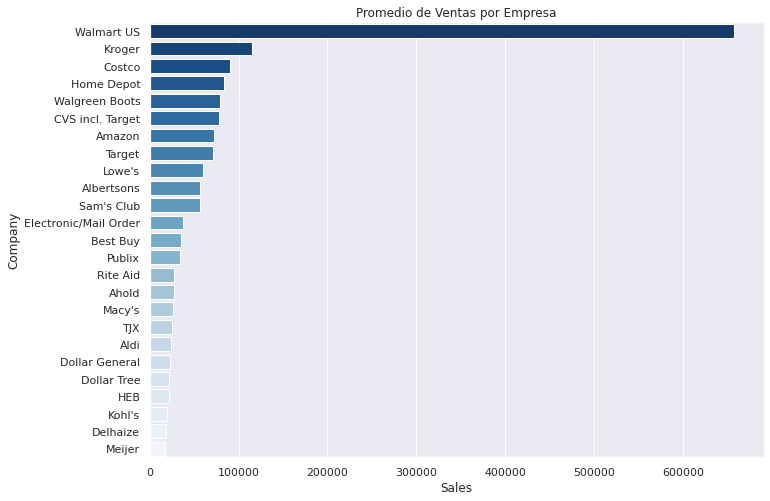

In [ ]:
# setting los graficos
sns.set(rc={'figure.figsize':(11,8)})

# Grafico donde se muestra la empresa dominante
bar = sns.barplot(
    data = df,
    y = 'Company',
    x = 'Sales',
    palette="Blues_r"
).set_title('Promedio de Ventas por Empresa')

In [ ]:
# Detecto a la empresa dominandte como Walmart US
promedio_general = df['Sales'].mean().round(2)
promedio_sindominante = df.query('Company != "Walmart US"')['Sales'].mean().round(2)
print('Promedio del mercado', str(promedio_general))
print('Promedio del mercado SIN COMPANIA DOMINANTE', str(promedio_sindominante))

Promedio del mercado 71063.08
Promedio del mercado SIN COMPANIA DOMINANTE 46602.42


##### Detectamos la empresa dominante, segun el grafico, el mercado de retail es dominado por Walmart US
##### El promedio del mercado retail es 71 063, pero **sin la porcion de mercado que maneja Walmart el promedio del mercado seria 46 602**.
##### Casi la mitad de mercado de retail en ventas es aportado por Walmart

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Text(0.5, 1.0, 'Histograma de Ventas por Empresa')

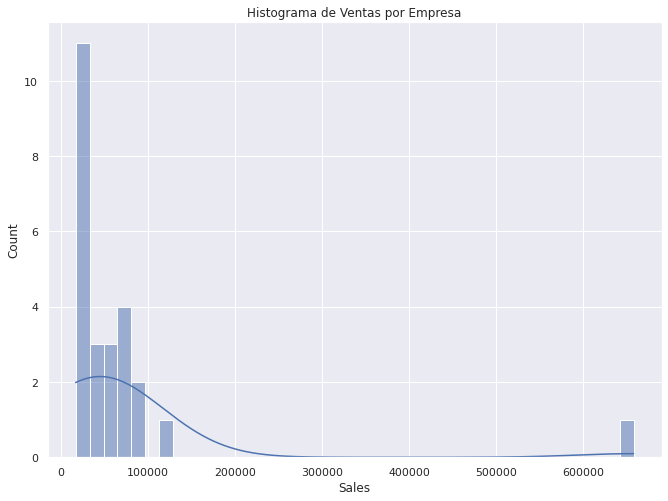

In [ ]:
# Histograma
sns.histplot(
    data = df,
    x = 'Sales',
    bins = 40,
    kde = True # para la linea de densidad
).set_title('Histograma de Ventas por Empresa')

In [ ]:
total_ventas = df.query('Sales <= 100000')['Sales'].mean()
print ('La mayoria de las empresas genero ', str(total_ventas), ' en promedio')

La mayoria de las empresas genero  43627.0  en promedio


##### La mayoria de compañias genero ventas entre 0 y 100 000
##### En promedio todas estas empresas generaron 43 627 en total

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

Text(0.5, 1.0, 'Histograma de Nro de Tiendas por Empresa')

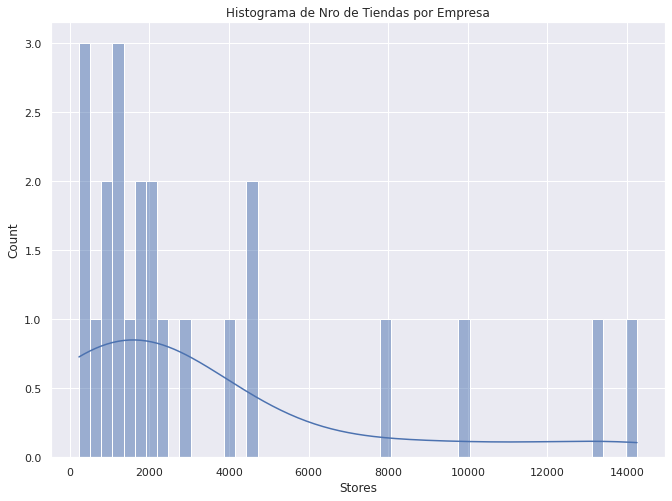

In [ ]:
# Histograma
sns.histplot(
    data = df,
    x = 'Stores',
    bins = 50,
    kde = True # para la linea de densidad
).set_title('Histograma de Nro de Tiendas por Empresa')

In [ ]:
total_tiendas = df.query('Stores <= 2000')['Stores'].mean().round(0)
print ('La mayoria de las empresas tiene ', str(total_tiendas), ' tiendas en promedio')

La mayoria de las empresas tiene  1088.0  tiendas en promedio


##### La mayoria de compañias tiene tiendas entre entre 0 y 2 000
##### En promedio todas estas empresas tienen 1 088 tiendas

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

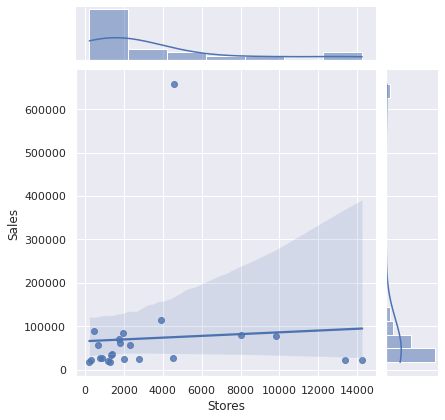

In [ ]:
# Vista de todas las empresas
sns.jointplot(
    data = df,
    x = 'Stores',
    y = 'Sales',
    kind = 'reg'
)

#### En esta primera vista no se ve una relacion entre tiendas y ventas
#### No se tiene una buena visbilidad de la mayoria de tiendas pues existe una tienda con ventas extremadamente altas (Wallmart) que cambia la amplitud del grafico
#### Haremos otro grafico excluyendo a Wallmart para ver si existe un relacion en las otras tiendas

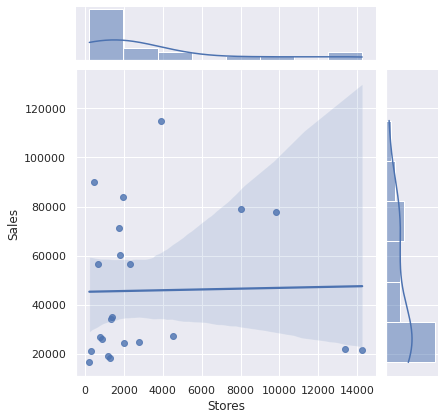

In [ ]:
# Vista de las empresas excluyendo Wallamart
sns.jointplot(
    data = df.query('Sales<=200000'),
    x = 'Stores',
    y = 'Sales',
    kind = 'reg'
)

#### Con este grafico tenemos una mejor vista de las empresas; sin embargo, no se encuentra una relacion a mas tiendas mas ventas

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
max_sales = df['Sales'].max()
min_sales = df['Sales'].min()
rango = [min_sales, max_sales]
print('El rango de ventas esta entre ', rango)

El rango de ventas esta entre  [16592, 658119]


### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
top_tiendas = df.sort_values('Stores', ascending = False)[['Company', 'Stores']].head(5)

top_ventas = df.sort_values('Sales', ascending = False)[['Company', 'Sales']].head(5)

Voy a unir la lista de las empresas con mas tiendas con las empresas con mas ventas, tomando de base a *top_tiendas* y buscando si es que esta en la lista de *top_ventas*

In [ ]:
# left join top_tiendas y top_ventas
pd.merge(
    top_tiendas,
    top_ventas,
    how = 'left',
    on = 'Company'
).dropna()['Company']

3    Walgreen Boots
4        Walmart US
Name: Company, dtype: object

#### De las 5 empresas con mas tiendas, solo 2 se encuentran de las 5 empresas con mas ventas
#### Walgreen Boots y Walmart US son las empresas que cumplen las dos condiciones

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
df.groupby(
    by = 'Category',
    as_index = False
).agg(
    sales_t = ('Sales','sum')
).sort_values(
    'sales_t',
    ascending = False)['Category'].head(1)

8    Supercenters
Name: Category, dtype: object

#### La categoria con mas ventas generadas en total es **Supercenters**

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

Tengo que hallar un ratio de relacion de las ventas entre el nro de tiendas para poder comparar (ventas por tiendas)

In [ ]:
df['venta_tienda'] = (df['Sales'] / df['Stores']).round(1)

Text(0.5, 1.0, 'Ventas por Tienda segun Empresa')

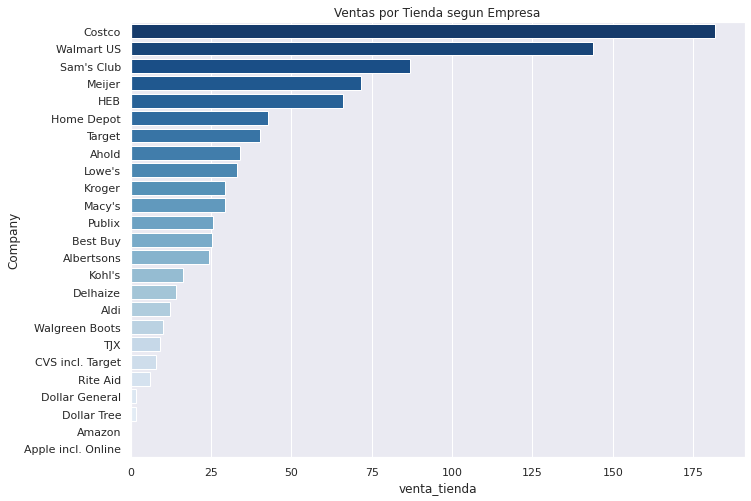

In [ ]:
sns.barplot(
    data = df,
    x = 'venta_tienda',
    y = 'Company',
    order = df.sort_values('venta_tienda', ascending = False)['Company'],
    palette = 'Blues_r'
).set_title('Ventas por Tienda segun Empresa')

#### La empresa con mayor venta por tienda es Costco

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

* Asumiendo que las ventas online se dan en la categoria **Electronic/Mail Order**
* No sabria que empresas tienen tienda y venta online, o cuales solo exclusivamente online

## III. Tus propias preguntas

### 10. Existe una correlacion entre ventas y tiendas por categoria

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b12a3667-3c78-4852-af87-39ed4472ff43' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>